In [34]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from tensorflow import keras 
import tensorflow as tf

In [4]:
(x_train,y_train),(x_test,y_test) = keras.datasets.mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 20s 2us/step


In [6]:
len(x_train)

60000

In [7]:
len(x_test)

10000

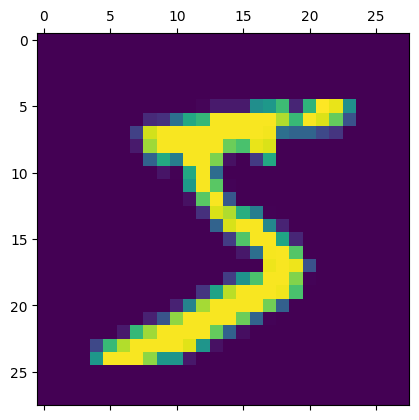

In [9]:
plt.matshow(x_train[0])

In [10]:
y_train[0]

5

In [20]:
x_train = x_train/255
x_test = x_test/255

In [21]:
x_train_flatten = x_train.reshape(len(x_train),28*28) #changing shape to 2D
x_test_flatten = x_test.reshape(len(x_test),28*28)

In [22]:
x_test_flatten.shape

(10000, 784)

In [23]:
x_train_flatten.shape

(60000, 784)

In [52]:
# creating simple layer network
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),     #change to 2D from 3D
    keras.layers.Dense(100,input_shape=(784,),activation='relu'),  #ouput input and activation fun
    keras.layers.Dense(10,activation='sigmoid')
])
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ['accuracy']
)
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 16s 6ms/step - accuracy: 0.8723 - loss: 0.4582
Epoch 2/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9601 - loss: 0.1403
Epoch 3/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 12s 6ms/step - accuracy: 0.9735 - loss: 0.0905
Epoch 4/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 14s 7ms/step - accuracy: 0.9796 - loss: 0.0667
Epoch 5/5
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 9s 5ms/step - accuracy: 0.9833 - loss: 0.0527


In [43]:
model.evaluate(x_test_flatten,y_test)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.9679 - loss: 0.1047


[0.0902237519621849, 0.9718000292778015]

In [44]:
pred = model.predict(x_test_flatten)

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step


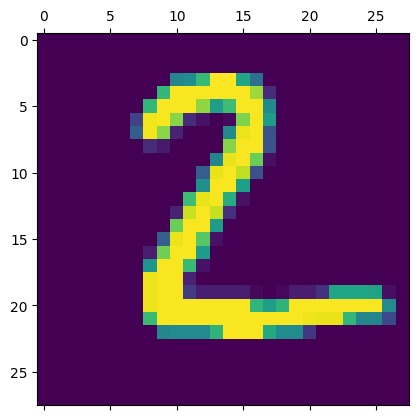

In [45]:
plt.matshow(x_test[1])

In [46]:
np.argmax(pred[1])

2

In [47]:
pred_labels = [np.argmax(i) for i in pred]

In [48]:
#confusion_matrix
cm=tf.math.confusion_matrix(labels=y_test,predictions=pred_labels)

In [49]:
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 968,    0,    2,    2,    2,    1,    1,    2,    1,    1],
       [   0, 1122,    3,    2,    0,    0,    1,    0,    7,    0],
       [   5,    1, 1001,    9,    2,    0,    0,   10,    4,    0],
       [   0,    0,    0,  996,    0,    0,    0,    4,    2,    8],
       [   3,    0,    2,    0,  956,    0,    3,    2,    2,   14],
       [   3,    0,    1,   17,    2,  860,    4,    1,    1,    3],
       [   6,    3,    3,    3,   10,    5,  924,    0,    4,    0],
       [   1,    3,   10,    5,    1,    0,    0,  994,    0,   14],
       [   5,    0,    4,   20,    5,    7,    1,    4,  915,   13],
       [   2,    4,    0,   10,    7,    1,    0,    2,    1,  982]])>